# Noises

In [153]:
image,label = ('example_images/reference_images/I04.bmp','example_images/reference_images/I04.bmp')

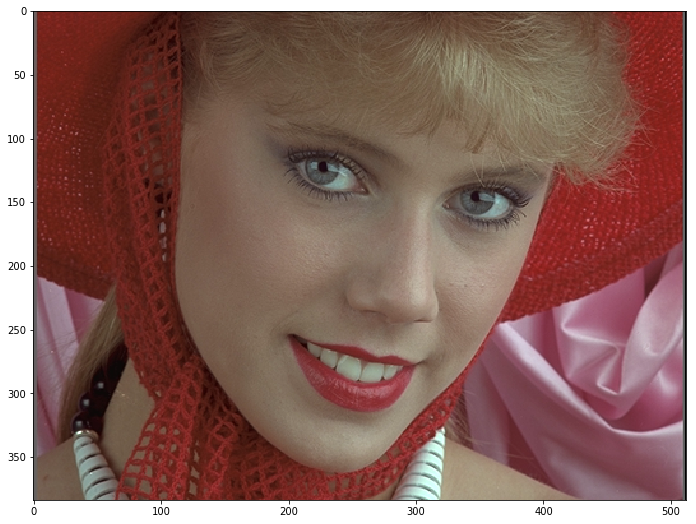

In [154]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch

plt.figure(figsize = (15,9))
img = Image.open(image)
lbl = Image.open(label)

trans = transforms.ToPILImage()
trans1 = transforms.ToTensor()
tens_img_to_show = trans(trans1(img))
tens_img = trans1(img)

plt.imshow(tens_img_to_show);

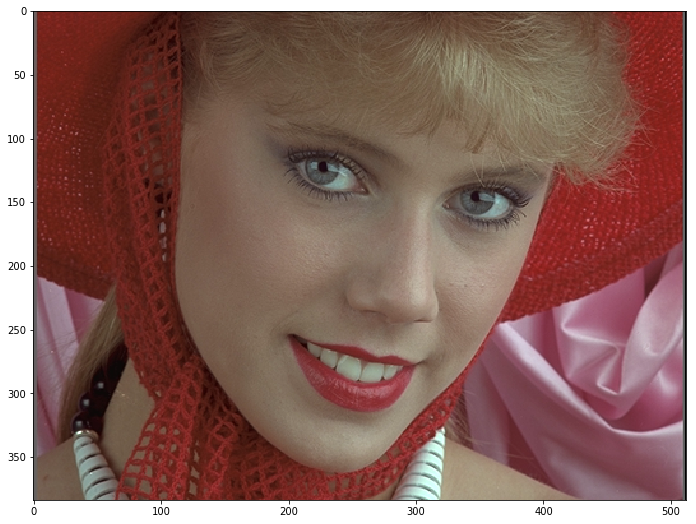

In [155]:
plt.figure(figsize = (15,9))
tens_lbl_to_show = trans(trans1(lbl))
tens_lbl = trans1(lbl)

plt.imshow(tens_lbl_to_show);

## Gaussian Noise

In [28]:
class _GaussianNoise(object):
    """Adding Gaussian Noise to the image
       
       mean (float): mean of Gaussian distribution
       std (float): std of Gaussian distribution
       
       images(tensors) - tuple of image and label
    """
    def __init__(self, mean=0.1, std=0.1):
        
        self.mean = mean
        self.std = std
              
    def __call__(self, images):
        image, label = images
        np.random.seed(0)
        trans = transforms.ToPILImage() # this transform for imshow
        
        return (trans(torch.clamp(image + torch.randn(image.size()) * self.std + self.mean,0,1)),trans(label))

In [29]:
transform = _GaussianNoise()
im_noised,labeled = transform((tens_img, tens_lbl))

## Noised image

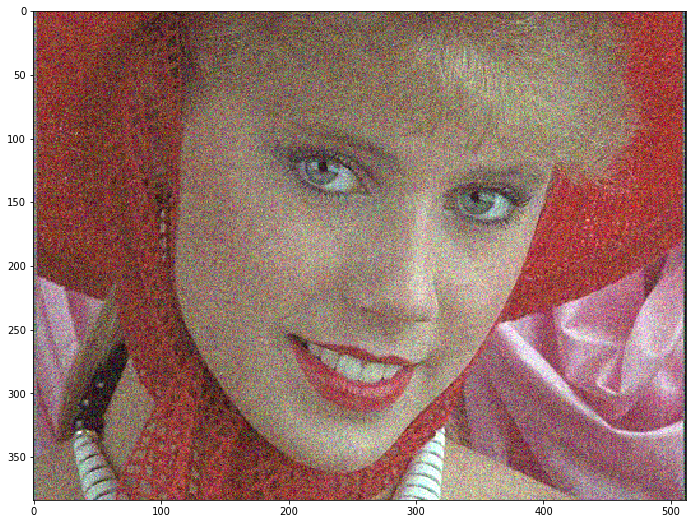

In [30]:
plt.figure(figsize = (15,9))
plt.imshow(im_noised);

## Random Erasing

In [165]:
class _Random_Erasing(object):
    """Randomly selects a rectangle region in an image and erases its pixels.
       
       p – probability that the random erasing operation will be performed.
       scale – range of proportion of erased area against input image.
       ratio – range of aspect ratio of erased area.
       value – erasing value. Default is 0. If a single int, it is used to erase all pixels. If a tuple of length 3, it is used to erase R, G, B channels respectively. If a str of ‘random’, erasing each pixel with random values.
       inplace – boolean to make this transform inplace. Default set to False.
    """
    def __init__(self, p = 1., scale = (0.01, 0.012), ratio = (0.5, 0.6), value=0, inplace=False):
        
        self.p = p
        self.scale = scale
        self.ratio = ratio
        self.value = value 
        self.inplace = inplace
        self.num_repetitions = 8
              
    def __call__(self, images):
        image, label = images
        np.random.seed(0)
        trans = transforms.ToPILImage() # this transform for imshow
        
        for repetition in range(self.num_repetitions-1):
            image = transforms.RandomErasing(self.p, self.scale, self.ratio, self.value, self.inplace)(image)
        
        return (trans(transforms.RandomErasing(self.p, self.scale, self.ratio, self.value, self.inplace)(image)),
                trans(label))

In [166]:
transform_eras = _Random_Erasing()
im_erased,labeled_1 = transform_eras((tens_img, tens_lbl))

## Erased image

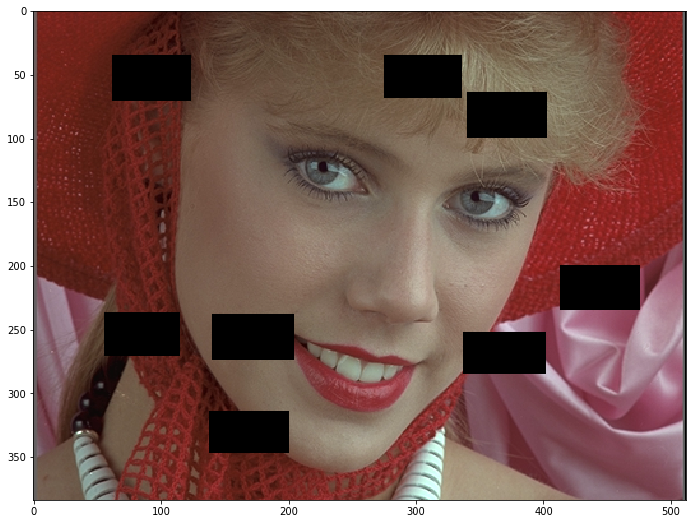

In [167]:
plt.figure(figsize = (15,9))
plt.imshow(im_erased);